In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import sys

np.set_printoptions(threshold=sys.maxsize)

In [ ]:
img = cv2.imread("1.jpg")

# Change color to RGB (from BGR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = img.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

In [ ]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 6
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
ret, labels = cv2.connectedComponents(segmented_data)
print(ret)
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img.shape))
 
plt.imshow(segmented_image)

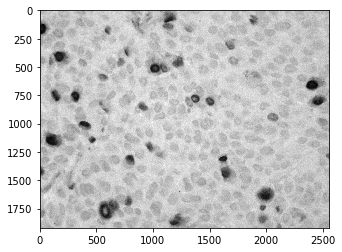

In [2]:
img = cv2.imread("1.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_correct = np.array(255 * (gray / 255) ** 1.2 , dtype='uint8')

# gray_equ = cv2.equalizeHist(gray)

plt.imshow(gray_correct, cmap="gray")
# gray_correct.min()

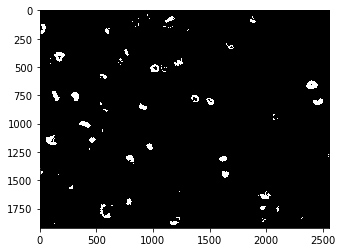

In [5]:
thresh = cv2.adaptiveThreshold(gray_correct, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 255, 35)
# thresh = cv2.bitwise_not(thresh)
# ret, thresh = cv2.threshold(gray_correct, 100, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(thresh, cmap="gray")

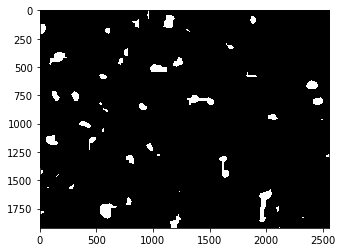

In [28]:
# Dilatation et erosion
kernel = np.ones((15,15), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=5)
img_erode = cv2.erode(img_dilation,kernel, iterations=5)
# clean all noise after dilatation and erosion
img_erode = cv2.medianBlur(img_erode, 7)

plt.imshow(img_erode, cmap="gray")

In [29]:
ret, labels = cv2.connectedComponents(img_erode)
print(ret)

50


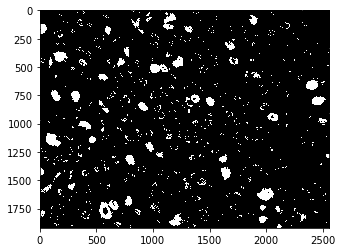

In [47]:
thresh1 = cv2.adaptiveThreshold(gray_correct, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 255, 15)
thresh1 = cv2.bitwise_not(thresh1)
# ret, thres = cv2.threshold(gray_correct, 1, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh1, cmap="gray")

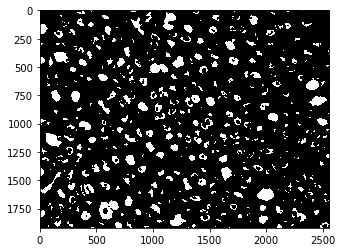

In [52]:
# Dilatation et erosion
kernel = np.ones((10,10), np.uint8)
img_dilation = cv2.dilate(thresh1, kernel, iterations=1)
img_erode = cv2.erode(img_dilation,kernel, iterations=1)
# clean all noise after dilatation and erosion
img_erode = cv2.medianBlur(img_erode, 7)

plt.imshow(img_erode, cmap="gray")

In [53]:
ret1, labels1 = cv2.connectedComponents(img_erode)

print(ret1)

578
